In [1]:
%pylab inline

import os
import random
import pandas as pd
from scipy.misc import imread


Populating the interactive namespace from numpy and matplotlib


In [2]:
root_dir=os.path.abspath('.')
data_dir='C:/Users/juhi.desai/Juhi/'
train=pd.read_csv(os.path.join(data_dir,'face_train/train.csv'))
test=pd.read_csv(os.path.join(data_dir,'face_test/test.csv'))


Age: MIDDLE


C:\Users\juhi.desai\AppData\Local\Continuum\anaconda3\envs\JuhiD\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


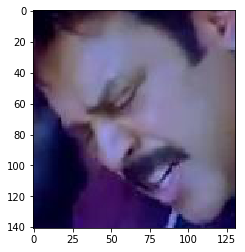

In [3]:
i=random.choice(train.index)
img_name=train.ID[i]
img=imread(os.path.join(data_dir,'face_train/Train',img_name))
print('Age:',train.Class[i])
imshow(img)

In [4]:
from scipy.misc import imresize

temp=[]
for img_name in train.ID:
    img_path=os.path.join(data_dir,'face_train/Train',img_name)
    img=imread(img_path)
    img=imresize(img,(32,32))
    img=img.astype('float32')
    temp.append(img)
    
train_x=np.stack(temp)

C:\Users\juhi.desai\AppData\Local\Continuum\anaconda3\envs\JuhiD\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\juhi.desai\AppData\Local\Continuum\anaconda3\envs\JuhiD\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


In [5]:
temp=[]
for img_name in test.ID:
    img_path=os.path.join(data_dir,'face_test/Test',img_name)
    img=imread(img_path)
    img=imresize(img,(32,32))
    img=img.astype('float32')
    temp.append(img)
    
test_x=np.stack(temp)

C:\Users\juhi.desai\AppData\Local\Continuum\anaconda3\envs\JuhiD\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\juhi.desai\AppData\Local\Continuum\anaconda3\envs\JuhiD\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


In [6]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [7]:
import keras

Using TensorFlow backend.


In [8]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
train_y=lb.fit_transform(train.Class)
train_y=keras.utils.np_utils.to_categorical(train_y)
train_y.shape

(19906, 3)

In [9]:
i1=(32,32,3)
h1=500
o1=3
e1=5
b1=120
from keras.models import Sequential
from keras.layers import Dense,Flatten,InputLayer

model=Sequential([InputLayer(input_shape=i1),Flatten(),Dense(units=h1,activation='relu'),Dense(units=o1,activation='softmax'),])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1503      
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=b1, epochs=e1, verbose=1, validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/5
15924/15924 [==============================] - 2s 143us/step - loss: 7.4114 - acc: 0.5401 - val_loss: 7.3507 - val_acc: 0.5439
Epoch 2/5
15924/15924 [==============================] - 2s 125us/step - loss: 7.3748 - acc: 0.5425 - val_loss: 7.3507 - val_acc: 0.5439
Epoch 3/5
15924/15924 [==============================] - 2s 126us/step - loss: 7.3748 - acc: 0.5425 - val_loss: 7.3507 - val_acc: 0.5439
Epoch 4/5
15924/15924 [==============================] - 2s 127us/step - loss: 7.3748 - acc: 0.5425 - val_loss: 7.3507 - val_acc: 0.5439
Epoch 5/5
15924/15924 [==============================] - 2s 135us/step - loss: 7.3748 - acc: 0.5425 - val_loss: 7.3507 - val_acc: 0.5439
